<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_3/swan3.png" height="300" width="300"> 



# <center> R для тервера и матстата <br>  <br> 8.2 Резкое погружение в финансовый мир </center>

Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2019). Автор ноутбука - [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

-------------------------------


В этой тетрадке мы по резкому погрузимся в финансовый мир. Джордан Белфорт уже подготовил для нас батискаф. Перед тем как подняться на борт батискафа, подгрузим парочку пакетов. 

In [3]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов
library("dplyr")    # Куда же без пакета под таблички :) 

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

### Мир фининасов 

 - Есть много разных инструментов: акции, облигации, деривативы
 
 - Гипотеза о логнормальности распределения цен $\Rightarrow$ модель Блэка-Шоулза и нобелевка
  
 - Её посмотрите на случайных процессах (уточните в учебной части, что осенью они точно будут)
 
 - В реальности всё сложнее 

В финансах есть много разных инструментов: акции, облигации, деривативы и т.п.  В основе огромного бесчисленного числа современных экономических теорий лежит гипотеза о том, что движение котировок подчиняется логнормальному распределению. То есть доходности распределены нормально. На всём этом строится пресловутая модель Блэка-Шоулза с их Нобелевской премией. В реальности всё гораздо сложнее и нам предстоит в этом убедиться.

# 1. Добыча финансовых данных

Для того, чтобы погрузиться в мир финансов, нам нужно раздобыть финансовых данных. В R для всего есть пакеты, верно? Воспользуемся пакетом `quantmod`, чтобы достать данных с Yahoo.Finance. 

In [5]:
# install.packages("quantmod")  # Устанавливаем пакет, если его нет 
# Внимание: устанавливать пакет надо один раз в жизни! 
# После установки пакета можно эту строчку удалить навсегода. 

library("quantmod") # Эта команда подключает пакет
# Внимание: подключать пакет нужно каждый раз, когда
# вы хотите использовать его в своём скрипте

Получаем данные о котировках apple с сайта Yahoo. Команда `getSymbols` умеет делать это.

In [8]:
getSymbols("YNDX", from="2014-01-01", to="2020-01-01")

[1] "YNDX"

In [9]:
df = YNDX        # Данные по акциям в таблицу df! 
df %>% head( )   # Все данные дневные

           YNDX.Open YNDX.High YNDX.Low YNDX.Close YNDX.Volume YNDX.Adjusted
2014-01-02     43.31     43.34    42.36      42.63     1724200         42.63
2014-01-03     42.99     43.34    42.63      42.90     1130400         42.90
2014-01-06     42.89     43.19    42.61      42.91     1809900         42.91
2014-01-07     43.17     43.94    42.06      43.53     2821300         43.53
2014-01-08     43.77     44.24    42.22      42.25     3146300         42.25
2014-01-09     43.43     45.42    43.17      44.22     5685700         44.22

In [10]:
# зададим столбцам свои имена 
colnames(df) = c('open', 'high', 'low', 'close', 'volume', 'adjusted')

df$time = 1:nrow(df) # Колонка под время для удобства
df %>% head( )

            open  high   low close  volume adjusted time
2014-01-02 43.31 43.34 42.36 42.63 1724200    42.63    1
2014-01-03 42.99 43.34 42.63 42.90 1130400    42.90    2
2014-01-06 42.89 43.19 42.61 42.91 1809900    42.91    3
2014-01-07 43.17 43.94 42.06 43.53 2821300    43.53    4
2014-01-08 43.77 44.24 42.22 42.25 3146300    42.25    5
2014-01-09 43.43 45.42 43.17 44.22 5685700    44.22    6

In [11]:
df %>% dim( ) # размеры таблички

[1] 1370    7

Как видите, цены бывают разными. Открытия, закрытия, самая высокая и низкая. Давайте посмотрим на них на одной красивой картинке. По полю `colour` R будет создавать для графика легенду. Самая последняя строка отобразит эту лененду на картинке. Опция `alpha` задаёт прозрачность линий. Попробуйте поменять её ради фана. 

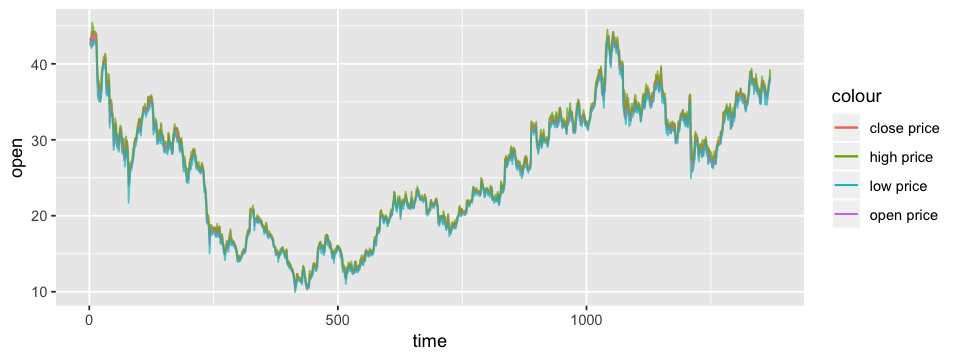

In [12]:
options(repr.plot.width=8, repr.plot.height=3)  # размер картинки (нужен только для отображения в тетрадке)

ggplot(df) +
  geom_line(aes(x = time, y = open,  colour = 'open price'), alpha = 0.7) +
  geom_line(aes(x = time, y = close, colour = 'close price'), alpha = 0.7) +
  geom_line(aes(x = time, y = high, colour = 'high price'), alpha = 0.7) +
  geom_line(aes(x = time, y = low, colour = 'low price'), alpha = 0.7) +
  scale_linetype_manual()

Забираем себе в долговременное пользование цены закрытия акций. Будем рисёрчить именно их. 

In [13]:
price <- as.numeric(df$close)
price[1:5]

[1] 42.63 42.90 42.91 43.53 42.25

Глянем на гистограмму для цен. Какие интересные особенности вы видите? Как они взаимосвязаны с первой картинкой? 

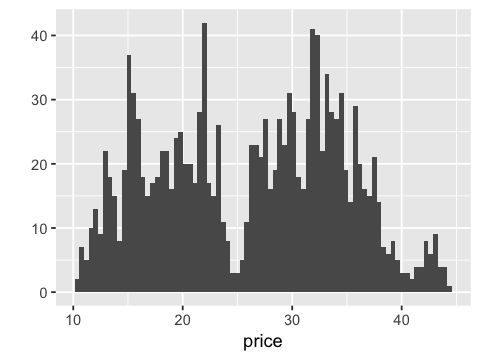

In [14]:
options(repr.plot.width=4, repr.plot.height=3)  # размер картинки
qplot(price, bins=80) 

Финансовые продукты характеризуются двумя основными характеристикам – __доходностью__ и __риском.__ С доходностью все довольно понятно – это процентное изменение стоимости за некоторый промежуток времени. 

__Вопрос:__ Как найти годовую доходность?

__Ответ:__ Это просто процентное изменение последней точки к первой.

In [15]:
tail(price, 1)/head(price, 1) - 1

[1] -0.1013371

Это много или мало? Почему?

Обычно финансисты работают с доходностями. Для этого есть несколько причин. Часть из них теоретическая, часть практическая. Не будем разбираться в них. Просто перейдём от цен к доходностям, то есть к изменению цен:

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Команда `diff` вернёт нам вектор из приращений в каждой точке. 

In [16]:
diff(price)[1:5]

[1]  0.270001  0.009998  0.619999 -1.279999  1.970001

Хотелось бы теперь просто разделить его на значения цен, но нельзя - они разной длины. Поэтому придётся выбросить первый элемент из вектора цен. 

In [17]:
R = diff(price)/price[-length(price)]
R[1:5]

[1]  0.0063335912  0.0002330536  0.0144488231 -0.0294049857  0.0466272426

Посмотрим на распределение доходностей. Как это не странно, оно оказывается куполообразным. Издали распределение напоминает собой нормальное. Однако это ещё не факт.

__Вопрос:__ что визуально говорит против нормальности? 

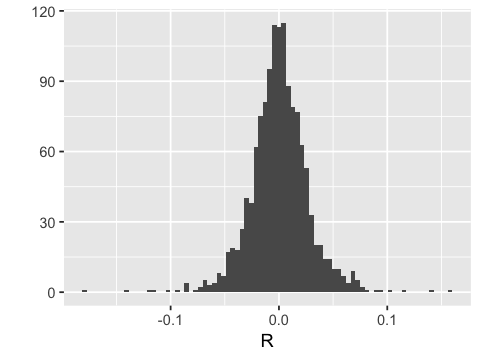

In [18]:
options(repr.plot.width=4, repr.plot.height=3) 
qplot(R, bins=80) 

Посмотрим на то как ряд из доходностей ведёт себя во времени.

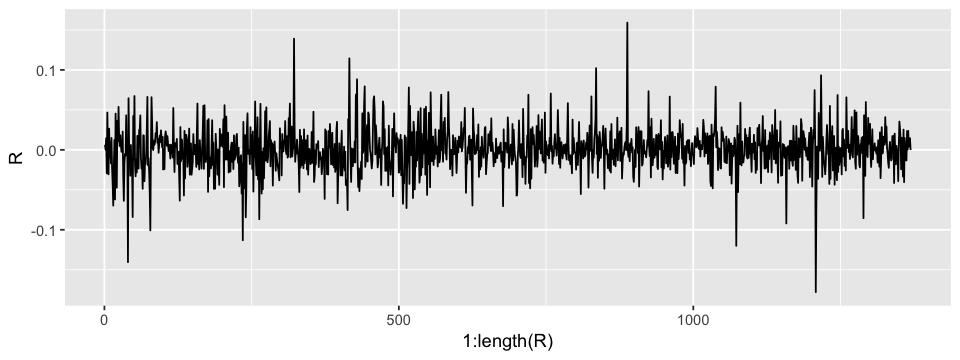

In [19]:
options(repr.plot.width=8, repr.plot.height=3) 
qplot(1:length(R), R, geom='line') 

Посмотрим на среднюю доходность по акциям.

In [20]:
mean(R)

[1] 0.0002940997

Мы глянули на гистограмму. Возможожно, что доходности пришли из нормального распределения. Но это далеко не факт. Как минимум наличие очень длинных хвостов, заставляет нас в этом сомневаться. Никто не в состоянии понять, нормален ли купол, по картинки. Нужно проверять гипотезу об этом. 

$$
\begin{aligned}
H_0 : & \text{ pяд доходностей имеет нормальное распределение} \\
H_1 : & \text{ pяд доходностей не распределён нормально.}
\end{aligned}
$$

Для проверки такой гипотезы существует довольно много тестов. Пройдёмся по нескольким. 

In [21]:
# Критерий Колмогорова - Смирнова 
ks.test(R, "pnorm", mean = mean(R), sd = sd(R))

Warning message in ks.test(R, "pnorm", mean = mean(R), sd = sd(R)):
“ties should not be present for the Kolmogorov-Smirnov test”


	One-sample Kolmogorov-Smirnov test

data:  R
D = 0.049398, p-value = 0.002509
alternative hypothesis: two-sided


In [22]:
# Критерий Шапиро-Уилка
shapiro.test(R)


	Shapiro-Wilk normality test

data:  R
W = 0.96087, p-value < 2.2e-16


Судя по всему, в данных нормальностью не пахнет. Давайте попробуем понять почему. Для этого построим ещё одну картинку, которая называется диаграммой квантиль-квантиль. Она позволяет сравнить выборочное распределение с теоретическим. 

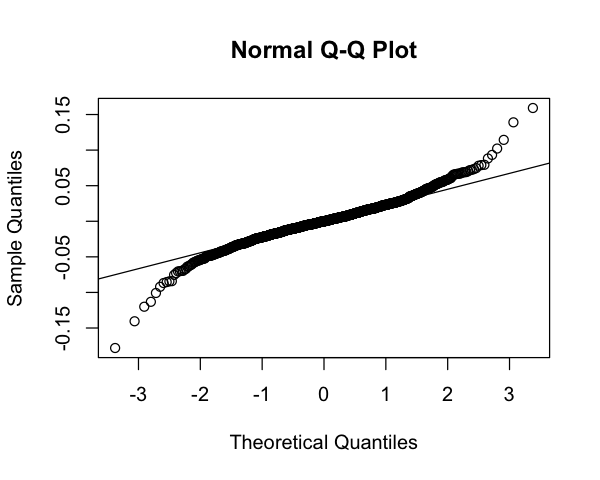

In [23]:
options(repr.plot.width=5, repr.plot.height=4)
qqnorm(R) # Рисуем график
qqline(R) # Добавляем линию квартилей

На диаграмме по оси $x$ откладываются значения из теоретического нормального распределения. По оси $y$ откладывают значения, которые фигурируют в выборке. Если бы наши наблюдения были из нормального распределения, они бы оказались на прямой. Центр, действительно, укладывается на неё. А вот хвосты с неё спадают. Они оказываются тяжелыми. Ниже мы попробуем использовать нормальное распределение для строительства $VaR$. Оно будет работать не очень хорошо. Надеюсь, что вы догадаетесь почему, когда я об этом вас спрошу. 

Давайте посмотрим на ещё два критерия. На критерий Крамера-Мизеса, который более чувсвителен, чем критерий Колмогорова к отклонениям в среднестане, а также на критерий Андерсона-Дарлинга, который более чувствителен к отклонениям в хвостах. Как думаете, где $p-value$ окажется меньше? 

In [33]:
# install.packages('goftest')
library('goftest')
ad.test(R, "pnorm", mean = mean(R), sd = sd(R))


	Anderson-Darling test of goodness-of-fit
	Null hypothesis: Normal distribution
	with parameters mean = 0.000294099675433791, sd = 0.027245323572525

data:  R
An = 8.783, p-value = 4.403e-05


In [34]:
cvm.test(R, "pnorm", mean = mean(R), sd = sd(R))


	Cramer-von Mises test of goodness-of-fit
	Null hypothesis: Normal distribution
	with parameters mean = 0.000294099675433791, sd = 0.027245323572525

data:  R
omega2 = 1.4414, p-value = 0.0002337


Напомню, что тест Андерсона-Дарлинга более чувствителен к отклонениям в хвостах, а тест Крамера-Мизеса к отклонениям в среднестане. Из-за того, что у нас вся разница сконцентрировалась в хвостах, для первого теста $p-value$ на порядок ниже.

# 2. Доходность и риск

Мы поговорили о доходности. В ней не было ничего сложного. Но вот что считать мерой риска? Мы рассмотрим 4 популярные характеристики, а дальше сосредоточимся на двух.

## 2.1 Стандартное отклонение доходности 

Название говорит само за себя. Возьмём ряд доходностей, найдём его стандартное отклонение. 

In [1]:
sd(R)

ERROR: Error in is.data.frame(x): объект 'R' не найден


__Вопрос:__ А это много? Вкладываем деньги или нет? 

__NB:__ Сравнивать акции на основе стандартного отклонения можно при равных доходностях. А чтобы сравнивать разные акции нужно использовать комбинированные метрики. Например, Коэффициент Шарпа – отношение ожидаемой доходности к ее стандартному отклонению:

$$
SR = \frac{E(R) - R_f}{\sqrt{Var(R)}}
$$

Тут $R_f$ - это доходность от безрискового актива. Коэффициент Шарпа используется для определения того, насколько хорошо доходность актива компенсирует принимаемый инвестором риск. При сравнении двух активов с одинаковым ожидаемым доходом, вложение в актив с более высоким коэффициентом Шарпа будет менее рискованным.

Такой метод оценки риска хорош, так как прост и понятен, но есть пара минусов. Во-первых стандартное отклонение ничего не говорит об экстремальности распределения. Во-вторых, стандартное отклонение не естественно, то есть на интуитивном уровне не понятно.

## 2.2 Максимальная просадка 

__Максимальная просадка (maximum drawdown)__ – это то, насколько сильно просел наш актив после максимального влета. В R есть готовые способы найти максимальную просадку. Мы найдём её сами. 

__Алгоритм:__

1. Говорим, что максимальная просадка равна 0.
2. Берем первую точку и объявляем ее максимумом цены.
3. Идем к следующей точке.
    * Если она больше максимума, то обновляем максимум.
    * Если меньше, то считаем в ней просадку. Если просадка больше максимальной, то обновляем максимальную
4. Повторяем шаг 3, пока не дойдем до конца.

In [23]:
maxDD <- 0
maxPr <- price[1]

for (i in 2:length(price)) {   # Проходим по всем точкам, начиная со второй
  if (price[i] > maxPr) {      # Проверяем не больше ли она текущего максимума
    maxPr <- price[i]          # Если больше, то меняем максимум на эту точку
  } else {
    DD <- (maxPr - price[i])/maxPr   # А иначе считаем просадку
    if (DD > maxDD) {                # И смотрим не больше ли эта просадка максимальной
      maxDD <- DD                    # А если больше, то меняем значение максимальной просадки
      }
  }
}

In [24]:
maxPr # максимальная цена
maxDD # максимальная просадка

[1] 44.22

[1] 0.7697874

__Вопрос:__ Чем хороша эта мера? А чем плоха?

## 2.3 Value-at-Risk

… или статистика $16:15$. Value-at-Risk на каком-либо уровне (скажем, $5\%$) – это просто квантиль на уровне $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше. Вот если сейчас не понятно, то точно стоит меня прервать. Считаем ее элементарно:

In [25]:
quantile(R, 0.05)

5% 
-0.04200491

Или способ для более продвинутых юзеров:

In [26]:
sort(R)[0.05*length(R)]

[1] -0.04252044

__Вопрос:__ чем хороша такая метрика? А чем она плоха? 

$VaR$ хорош, так как не требует гипотез о хоть какой-либо форме распределения и описывает именно ту часть распределения, которую мы боимся. Но $VaR$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$?…

## 2.4 Expected shortfall

Он же $ES$, conditional value at risk $(CVaR)$, average value at risk $(AVaR)$, и expected tail loss $(ETL)$. Но мы будем говорить $ES$. $ES$ - Это среднее значение по всем тем точкам, что оказались хуже $VaR$, То есть среднее по худшим $5\%$. Считаем:

In [27]:
# сделаем срез по всем доходностям меньше VaR
(R <= quantile(R, 0.05))[1:10] 

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [28]:
# И просто посчитаем по ним среднее
mean(R[R <= quantile(R, 0.05)]) 

[1] -0.06093517

__Вопрос:__ Чем плоха такая метрика? Чем хороша? Как дополняет $VaR$? 

## 2.5 Кто побеждает? 

- Да никто! 

- Все рассуждения о риске – это попытки запихнуть функцию распределения доходностей в одно единственное число. 

- Поэтому информация потеряется и все метрики будут не идеальны. В лучшем случае посредственны. 

А к чему это приведет, можно прочитать [в этой книге](https://yadi.sk/i/Zzqyy7OH3Rx3TG) (обязательно к прочтению для тех, кто видит себя трейдером, и занятное чтиво для остальных).

Попробуем чуть глубже вникнуть в $VaR$ и $ES$. Вот мы уже умеем находим $VaR$ и понимаем, что это такое. Взяли цены акций за год, нашли квантиль $5\%$. И говорим, что в будущем акции будут вести себя так же. То есть занимаемся моделированием, предсказанием, алхимией. А значит нужно научиться корректно делать это. 

# 3. Тренировочная и тестовая выборка

Но сначала о методологии анализа данных. Если вы занимаетесь моделированием чего угодно на данных, то вам нужно иметь две выборки: тренировочную и тестовую. На тренировочной вы строите модель, а на тестовой должны проверить ее качество. Давайте на примерах.

## 3.1 Кривая VaR

* __Шаг 1:__ Найти $VaR$ по тренировочной выборке 

* __Шаг 2:__ Понять насколько удачной получилась наша оценка по тестовой выборке


In [29]:
length(R)

[1] 1369

Давайте на первых $1000$ наблюдениях найдем $VaR$, а на оставшихся его оценим. Разбиваем на две выборки:

In [30]:
train <- R[1:1000]
test  <- R[1001:length(R)]

In [31]:
# строим оценку! 
var <- quantile(train, 0.05)
var

5% 
-0.04450548

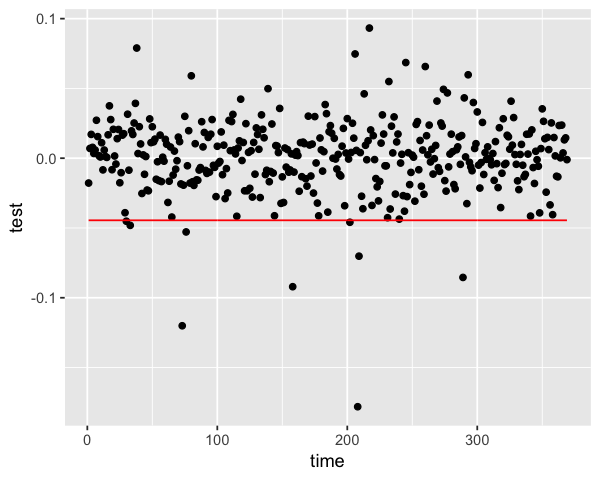

In [32]:
df_plot = data.frame(time = 1:length(test), test = test)

ggplot(df_plot, aes(x = time)) + 
    geom_point(aes(y = test)) + 
    geom_line(aes(y = var), color = 'red')

Какое-то количество точек пробили наше значение $VaR$. Мы думали, что это произойдёт только в $5\%$ случаев. Посмотрим в скольки процентах это произошло на тестовой выборке. 

In [33]:
length(test[test < var])/length(test) * 100

[1] 2.439024

__Вопрос:__ можно ли считать такой прогноз точным?

__Ответ:__ Х.з. Надо проверять гипотезу. 

## 3.2 Тест Купика

- Проверяет гипотезу о том, совпало ли число пробоин с ожидаемым 

- $K$ - число пробоин, $L$ - размер теста, $\alpha_0 = \frac{K}{L}$ - доля пробоин

- Гипотеза: 

$$
\begin{aligned}
H_0 : & \alpha_0 = \alpha \\
H_1 : & \alpha_0 \ne \alpha
\end{aligned}
$$

__Тест для проверки гипотезы:__ 

- $\alpha$ - вероятность пробить квантиль
- Правдоподобие: $L = (1 - \alpha)^{L-K} \cdot \alpha^K$
- Тест отношения правдоподобий: 

$$
LR = 2 \cdot \left[ \ln((1-\alpha_0)^{L-K} \cdot \alpha_0^K) - \ln((1 - \alpha)^{L-K} \cdot \alpha^K) \right].
$$

In [34]:
kupik_test = function(test, var){
    L <- length(test)
    K <- sum(test < var)
    a0 <- K/L
    a <- 0.05
    S <- 2*log((1-a0)^(L-K)*a0^K ) - 2*log((1-a)^(L-K)*a^K)
    pval <- 1 - pchisq(S, 1)
    return(pval)
    }

In [35]:
kupik_test(test, var)

[1] 0.01255063

На $5\%$ уровне значимости гипотеза не отвергается. На $1\%$ мы бы её отвергли.

## 3.3 Почему всё это плохо? 

- А потому, что мы не расширяем обучающую выборку, то есть не учитываем новую информацию. Мы один раз предсказали $VaR$ и так с ним и сидим.

-  Выделим $N$ точек, найдём по ним $VaR$ для $N+1$ точки, а затем сдвинемся вправо и по $N+1$ точке найдём $VaR$ для $N+2$ точки. В итоге $VaR$ будет в каждой точке разный.

In [36]:
N <- 200 # В каком окне идём

test <- R[(N+1):length(R)] # Текущая тестовая выборка
VaR <- rep(0, length(test)) # Запишем сюда пока нули.

for (i in (N+1):length(R)){
    train <- R[(i-N):(i-1)]
    VaR[i-N] <- quantile(train, 0.05)
}

А теперь нарисуем:

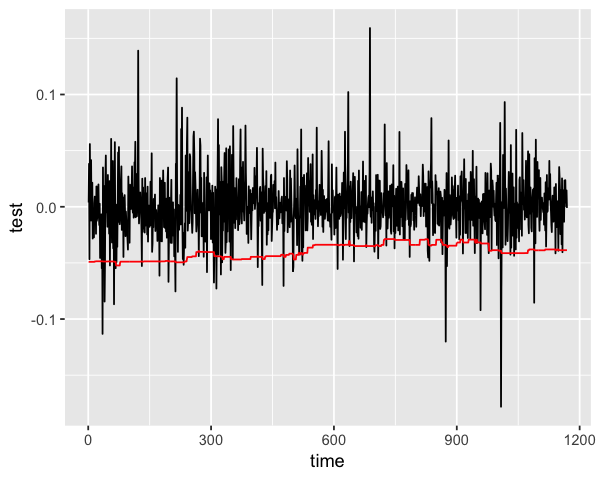

In [37]:
df_plot = data.frame(time = 1:length(test), test = test, VaR=VaR)

ggplot(df_plot, aes(x = time)) + 
    geom_line(aes(y = test)) + 
    geom_line(aes(y = VaR), color = 'red')

Видали? Получилась кривая $VaR$! Что нужно сделать теперь? Верно, провести тест Купика.

In [38]:
kupik_test(test, VaR)

[1] 0.9412494

Получилось гораздо лучше, чем раньше. Как думаете, почему? 

# 4. Систематизируем знания! 

- То, что мы делали выше, называется __историческим способом оценки $VaR$__

- Хотим более сложные модели, например, с предпосылкой, что распределение доходностей нормальное

- Будем брать последние $N$ точек, подгонять под них нормальное распределение, и искать квантиль по нему

То, что мы делали до этого момента, называется историческим способом оценки $VaR$. Нужен квантиль $5\%$? Вот и бери $5\%$ худших значений. Работает? да. Но как-то неинтересно. Давайте теперь по-настоящему моделировать. Например, я решу, что мое распределение доходностей нормальное. Выше мы с вами обсудили, что это надо бы проверить. И даже проверили.  И выяснили, что это не так. Скажу больше, чаще всего это не так. 

Давайте сделаем вид, что мы плохие исследователи, которые не проверяют предпосылки и слепо верят в нормальные распределения на фондовых рынках. 

Доходности нормально распределены. Тогда мне нужно искать $VaR$ в каждой точке чуть-чуть по другому: взять последние $N$ точек, подогнать под них нормальное распределение и найти его квантиль. Подогнать нормальное распределение просто: нужно взять распределение с таким же средним и дисперсией. 

Сначала сравним VaR новым и старым методом на всех данных:

In [39]:
quantile(R, 0.05)  # Исторический подход

5% 
-0.04200491

In [40]:
qnorm(0.05, mean=mean(R), sd=sd(R)) # новый уровень де***a

[1] -0.04452107

Теперь построем кривую $VaR$!

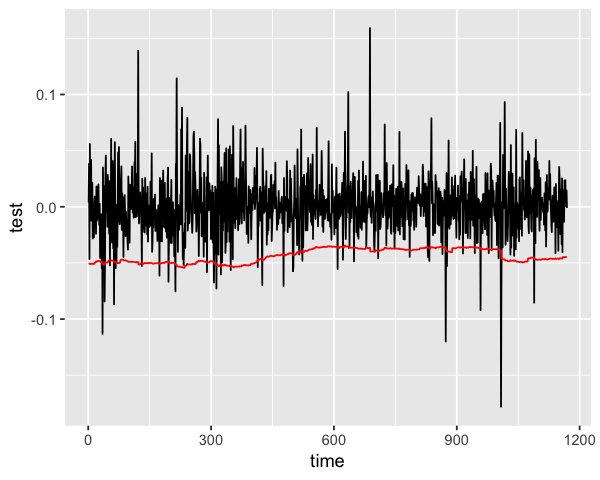

In [41]:
N <- 200
test <- R[(N+1):length(R)]
VaR <- rep(0, length(test))
for (i in (N+1):length(R)){
  train <- R[(i-N):(i-1)]
  VaR[i-N] <- qnorm(0.05, mean=mean(train), sd=sd(train))
}

df_plot = data.frame(time = 1:length(test), test = test, VaR=VaR)

ggplot(df_plot, aes(x = time)) + 
    geom_line(aes(y = test)) + 
    geom_line(aes(y = VaR), color = 'red')

И тест Купика!

In [42]:
kupik_test(test, VaR)

[1] 0.02991108

Чем метод лучше исторического? А чем хуже? Дополнительный вопрос для тех, кто читал "Чёрного Лебедя": А что вообще про всё это думает Талеб? 

# 5. Знакомство с ограми

### Это огр:

![](https://qna.center/storage/photos/grande36/77296.jpg)

### А это ОГР: 

$$
f(x) = \frac{(\gamma/\delta)^\lambda}{\sqrt{2\pi}K_\lambda(\delta \gamma)} \; e^{\beta (x - \mu)} \cdot \frac{K_{\lambda - 1/2}\left(\alpha \sqrt{\delta^2 + (x - \mu)^2}\right)}{\left(\sqrt{\delta^2 + (x - \mu)^2} / \alpha\right)^{1/2 - \lambda}},
$$

где 

$$
K_{\alpha}(z) = \frac{\pi}{2 \cdot \sin(\alpha \pi)} [I_{-a}(z) - I_a(z)],
$$

где 

$$
I_a(z)  = \sum_{k=0}^{\infty} \frac{(\frac{z}{2})^{2k + a}}{k! \cdot \Gamma(k + a + 1)},
$$

где 

$$
\Gamma(z) = \int_0^{\infty} t^{z-1} e^{-t} dt.
$$

### Фишка ОГР

- Это формула плотности вероятности Обобщённого Гиперболического Распределения. Какая была проблема с нормальным распределением? Хвосты плохо описывало и ассиметрию не поддерживало. ОГР умеет почти всё. У него целых 5 параметров: $\lambda$, $\alpha$, $\beta$, $\delta$, $\mu$ и $\gamma = \sqrt{\alpha^2 - \beta^2}$  для простоты  формулы (хаха).

- Собственно Гаусс, Стьюдент, обратный Гаусс, обратное Хи-квадрат и многое другое - это всё частные случаи ОГР. И раз мы не смогли хорошо подогнать гауссиану, то ОГР то точно сможем! За работу с этим огромным классом распределений  в R отвечает пакет `ghyp`. Его нужно установать и подключить. 

In [44]:
# install.packages("ghyp")
library("ghyp")

В нём есть довольно много хороших функций. Функции для подгонки: `fit.*uv` - для подгонки одномерных распределений, `fit.*mv` - для подгонки многомерных распределений, где `*` это `gauss`, `ghyp`, `hyp`, `NIG`, `t` и `VG` для разных распределений. 

Так как мы очень крутые, то подгоним сразу самое общее распределение под наши данные:

In [45]:
ghyp_dist <- fit.ghypuv(R, silent = TRUE)
summary(ghyp_dist)


Asymmetric Generalized Hyperbolic Distribution:

Parameters:
       lambda     alpha.bar            mu         sigma         gamma 
-0.9632886091  0.9729168051 -0.0002201273  0.0269486278  0.0004441665 

Call:
fit.ghypuv(data = R, silent = TRUE)

Optimization information:
log-Likelihood:                3070.071 
AIC:                           -6130.142 
Fitted parameters:             lambda, alpha.bar, mu, sigma, gamma;  (Number: 5)
Number of iterations:          502 
Converged:                     FALSE 
Error code:                    1 
Error message:                  


Смотрим на результат:

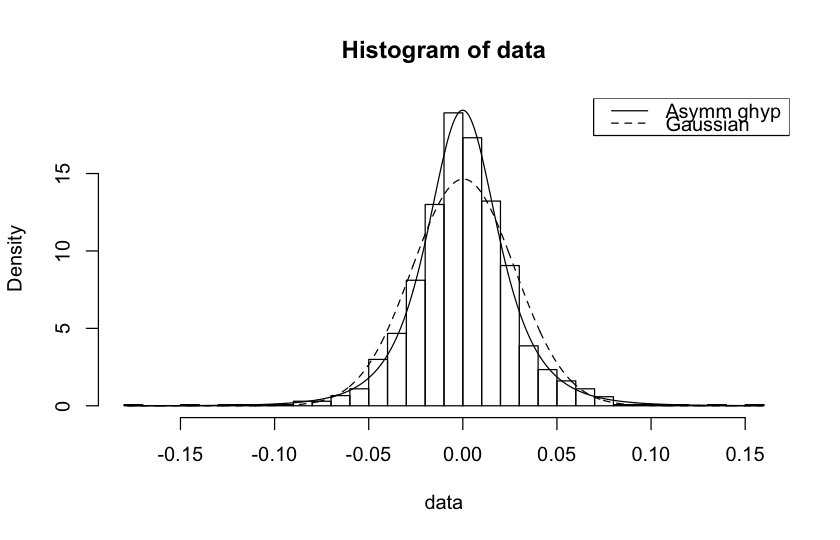

In [46]:
options(repr.plot.width=7, repr.plot.height=4.5)
hist(ghyp_dist)

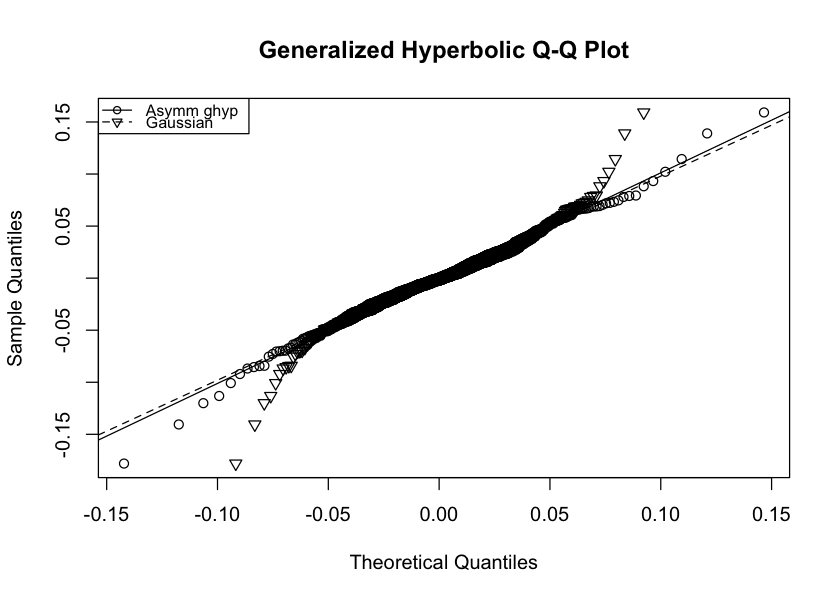

In [47]:
options(repr.plot.width=7, repr.plot.height=5)
qqghyp(ghyp_dist)

Но может ОГР эо слишком? И стьюдент был бы лучше? Или NIG? Для этого есть информационный критерий Акаике, 

$$AIC = 2k - 2 \cdot ln(L),$$ 

где $k$ - количество параметров, а $L$ - правдоподобие. Подробнее про него есть в третьей домашке. Не поленитесь сделать её! 

In [48]:
aic <- stepAIC.ghyp(R, dist=c("ghyp", "hyp", "t", "gauss"), silent=TRUE)

Currently fitting: asymmetric ghyp 
Currently fitting: asymmetric hyp 
Currently fitting: asymmetric t 
Currently fitting: symmetric ghyp 
Currently fitting: symmetric hyp 
Currently fitting: symmetric t 
Currently fitting: gauss


In [49]:
aic$best.model

Symmetric Student-t Distribution:

Parameters:
          nu           mu        sigma        gamma 
4.2566135705 0.0001626458 0.0275872497 0.0000000000 

log-likelihood:
3070.074


Call:
stepAIC.ghyp(data = R, dist = c("ghyp", "hyp", "t", "gauss"),     silent = TRUE)


Дело осталось за малым: найти $VaR$.  В пакете `ghyp` есть готовые функции для поиска квантилей. На вход они принимают вероятность и модель. 

In [50]:
qghyp(0.05, object = aic$best.model)

[1] -0.04192769

Построим кривую? Только теперь в каждой точке нам нужно будет:

1. переопределять лучшее распределение. 
2. Находить его квантиль.

__Внимание! Этот цикл выполняется довольно долго.__ А ещё генерируется куча текста.

In [ ]:
N <- 200
test <- R[(N+1):length(R)]
VaR <- rep(0, length(test))
for (i in (N+1):length(R)){
  train <- R[(i-N):(i-1)]
  model <- stepAIC.ghyp(train, dist=c("ghyp", "hyp", "t", "gauss"), silent=T)$best.model
  VaR[i-N] <- qghyp(0.05, object = model)
}

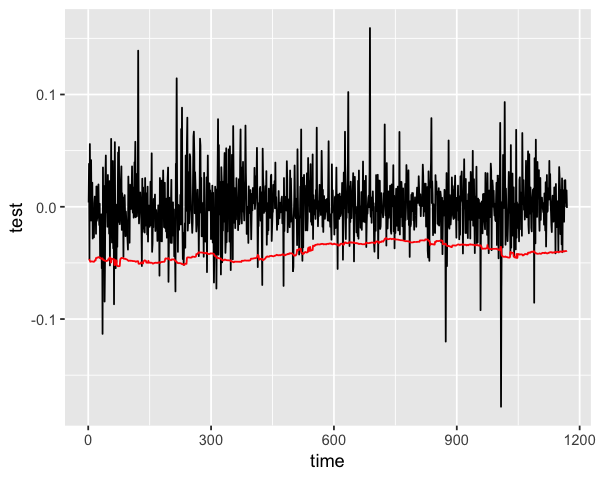

In [52]:
options(repr.plot.width=5, repr.plot.height=4)
df_plot = data.frame(time = 1:length(test), test = test, VaR=VaR)

ggplot(df_plot, aes(x = time)) + 
    geom_line(aes(y = test)) + 
    geom_line(aes(y = VaR), color = 'red')

Надеюсь, что всё получилось ок. Сразу тест Купика.

In [53]:
kupik_test(test, VaR)

[1] 0.8358962

Ваши выводы? 

# 6. И снова метод Монте-Карло

Зачем он то тут? А затем, что мы умеем находить $VaR$ для ОГР, но не $ES$. Ещё раз $VaR$: 

In [54]:
qghyp(0.05, object = aic$best.model)

[1] -0.04192769

А теперь $ES$. Генерим дофига огромную выборку и смотрим какие именно потери попали в хвост. Считаем среднее по этим потерям. 

In [56]:
N = 10^6 # Количество точек для Монте-Карло.
mean(sort(rghyp(N, object = aic$best.model))[1:N*0.05])

Warning message in rt(n, df = nu) * sqrt((nu - 2)/nu) * object@sigma:
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
”

[1] -0.06224945

Если понятно, почему ES считается именно так, то круто! Если нет, но вы читаете это на лекции, то сейчас я все объясню. Если не понятно, а лекцию вы пропустили, то очень жаль :(

## Сухой остаток: 

На рынке много ценных бумаг. Хотелось бы перед инвестирвоанием измерить их риск. Можно делать это с помощью разных метрик. Одни из самых распространённых: $VaR$ и $ES$. 

$VaR$ - выраженная в деньгах оценка величины, которую не превысят ожидаемые в течении данного периода потери с заданной вероятностью, то есть: 

$$
P(X < VaR_{1-\alpha}) = 1 - \alpha.
$$

Говоря нормлаьным языком, это квантиль уровня $1-\alpha$ для наших потерь. 

Минусы меры: 

1. Это всего лишь квантиль, оцененный на онове наблюдаемой выборки. 
2. Ссылаясь на $VaR$, как на максимальную потерю, мы ожидаем две или три крупные потери за год. Однако ряд из прошлых значений может не включать многие негативные события (толстые хвосты). 
3. Показывает нетипичный, экстримальный уровень потерь 

$$
ES_{1-\alpha} = E(X \mid X>VaR_{1-\alpha})
$$

В отличие от $VaR$ показывает, что скорее всего произойдёт при реализации потерь. 

Для тестирования качества оценок риска используется кривая $VaR$ - набор последовательных во времени значений $VaR$. Достоверность оценки проверяется на тестовом периоде с помощью теста Купика. 

## Авторские права и почиташки 

В основе этой тетрадки (вплоть до копипасты) лежит [курс моего друга, Ильи Езепова](https://rpubs.com/iezepov) по рискам и всяким другим прикольным штукам в R. Для того, чтобы успешно его освоить, надо уметь хорошо проверять гипотезы, а также немного подучить эконометрику. 

Вы смело можете попробовать ознакомиться с ним. 

* [Лекция 1 - вводная](https://rpubs.com/iezepov/e502lec1)
* [Лекция 2 - кривая VaR, пакет ghyp и Монте-Карло](https://rpubs.com/iezepov/e502lec2)
* [Лекция 3 - разговоры о волатильности, GARCH и ARCH модели. ](https://rpubs.com/iezepov/e502lec3)
* [Лекция 4 - инвестируем в портфель и изучаем копулы.](https://rpubs.com/iezepov/e502lec4)
* [Лекция 5 - много разных картинок.](https://rpubs.com/iezepov/e502lec5)
* [Лекция 6 - моделирование хвостов и непараметрические оценки.](https://rpubs.com/iezepov/e502lec6)
* [Лекция 7 - PCA, факторный анализ, кластеризация и многое другое.](https://rpubs.com/iezepov/e502lec7)
* [Лекция 8 - Временные ряды и панельные данные в R](https://rpubs.com/iezepov/e502lec8) 

Пусть ссылки на все эти лекции лежат тут. Когда вы морально будете готовы вникнуть в них, читайте! :) Кстатит говоря, если хотите погрузится в финансовый мир не так резко, как мы это сделали сегодня, прочтите [книгу Кванты](https://yadi.sk/i/ryFfPZ8_1uTO6g) и книгу [Хулиганская экономика.](https://yadi.sk/i/dpNfMQNSQexUTg) Пацаны очень чётко в них всё расписывают. Такой научпоп сойдёт за курс введения в финансы.

* Если есть желание почитать серьёзный учебник, подойдёт [вот эта книга.](https://yadi.sk/i/B2wAalCi_kNpDg) Вся 7 глава в ней описывает теорию экстремальных значений. 
* [Небольшой холивар Талеба и Пинкера о войнах и тяжёлых хвостах](https://newochem.ru/politika/neuzhto-stalo-menshe-vojn/)